## Bank Marketing
## classification (Decision Tree , Logistic Regression, Support Vector Mashine)
## use graphviz and ROC ,Confusion Matrix , ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('bank-additional-full.csv', delimiter=';')
# TIP: if you can't use delimiter you see data not in correct order try it without delimiter to see what happen
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank.info()
# we have 21 columns and non of theme are null its great and see the y is my label that represent no and yes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
print('minimum age :',bank['age'].min(), 'maximum age:',bank['age'].max(),'mean age:',bank['age'].mean(),
    '\n','q1:',np.quantile(bank['age'], 0.25),
    '\n','q2:',np.quantile(bank['age'], 0.50),
    '\n','q3:',np.quantile(bank['age'], 0.75))

minimum age : 17 maximum age: 98 mean age: 40.02406040594348 
 q1: 32.0 
 q2: 38.0 
 q3: 47.0


In [5]:
def classi_age(x):
    if x <= np.quantile(bank['age'], 0.25):
        return 0
    elif x > np.quantile(bank['age'], 0.25) and x <= np.quantile(bank['age'], 0.50):
        return 1
    elif x >= np.quantile(bank['age'], 0.50):
        return 2
bank['age'] = bank['age'].apply(classi_age)


In [6]:
print(bank['job'].unique(),
      '\n',bank['marital'].unique(),
      '\n',bank['education'].unique(),
      '\n',bank['default'].unique(),
      '\n',bank['housing'].unique(),
    '\n', bank['loan'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 
 ['married' 'single' 'divorced' 'unknown'] 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 
 ['no' 'unknown' 'yes'] 
 ['no' 'yes' 'unknown'] 
 ['no' 'yes' 'unknown']


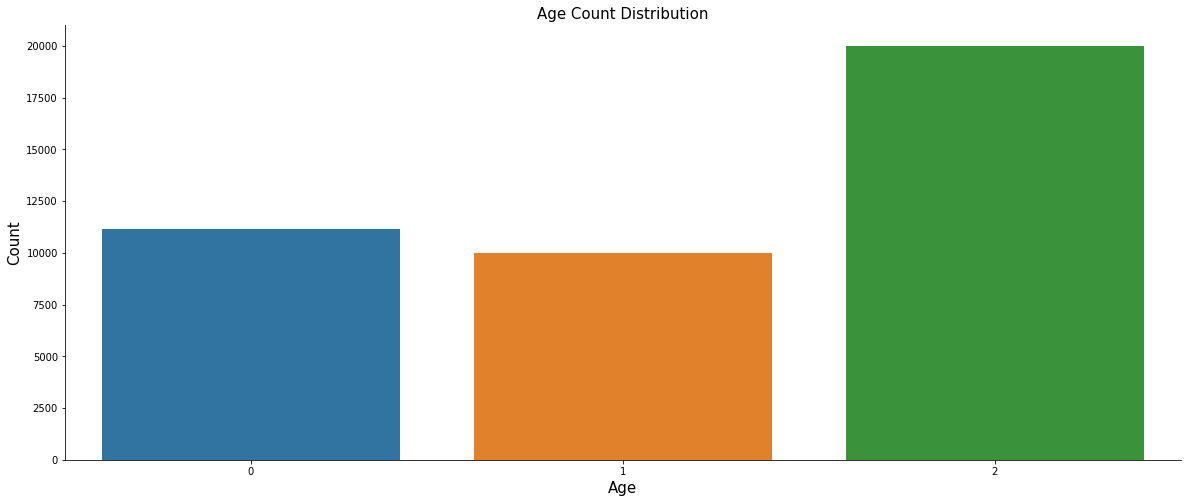

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
#0: mean age < 32
#1: mean 32 > age < 38
#3: mean age > 38

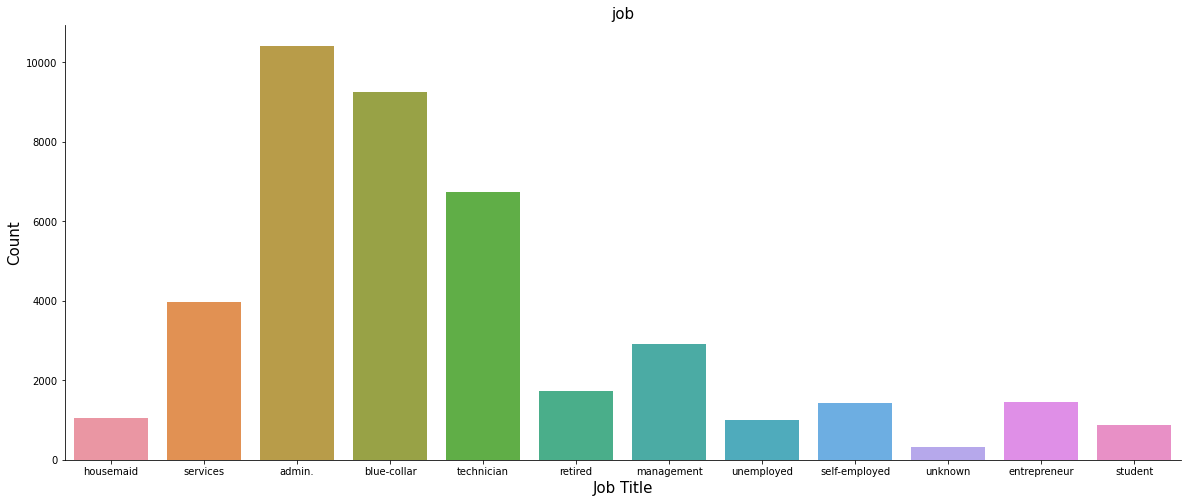

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank)
ax.set_xlabel('Job Title', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('job', fontsize=15)
sns.despine()

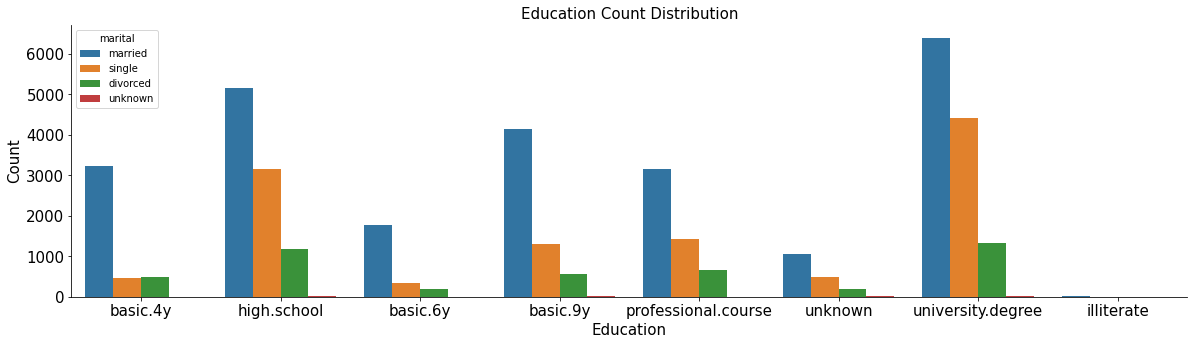

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education',hue = 'marital', data = bank)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

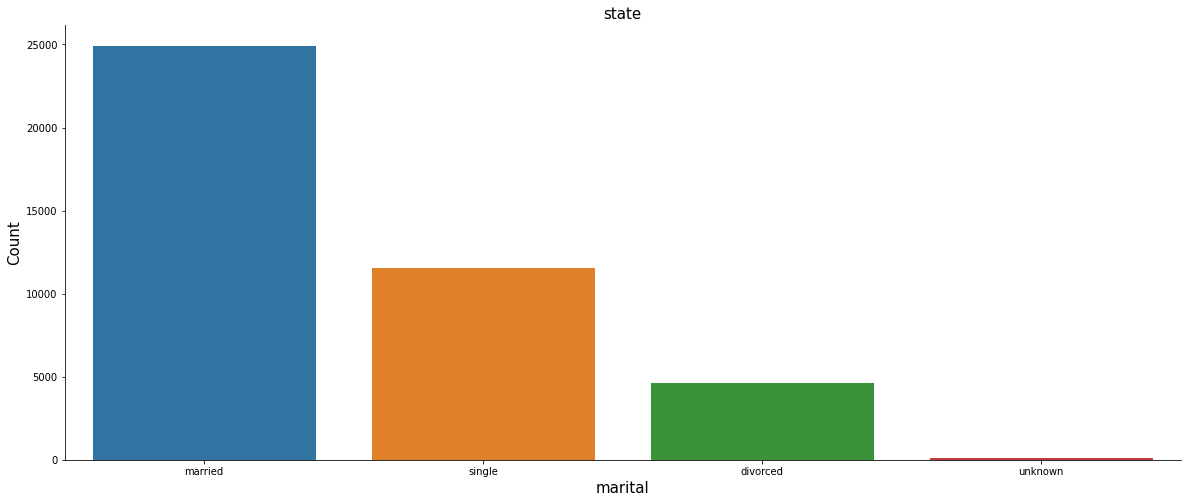

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data = bank)
ax.set_xlabel('marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('state', fontsize=15)
sns.despine()

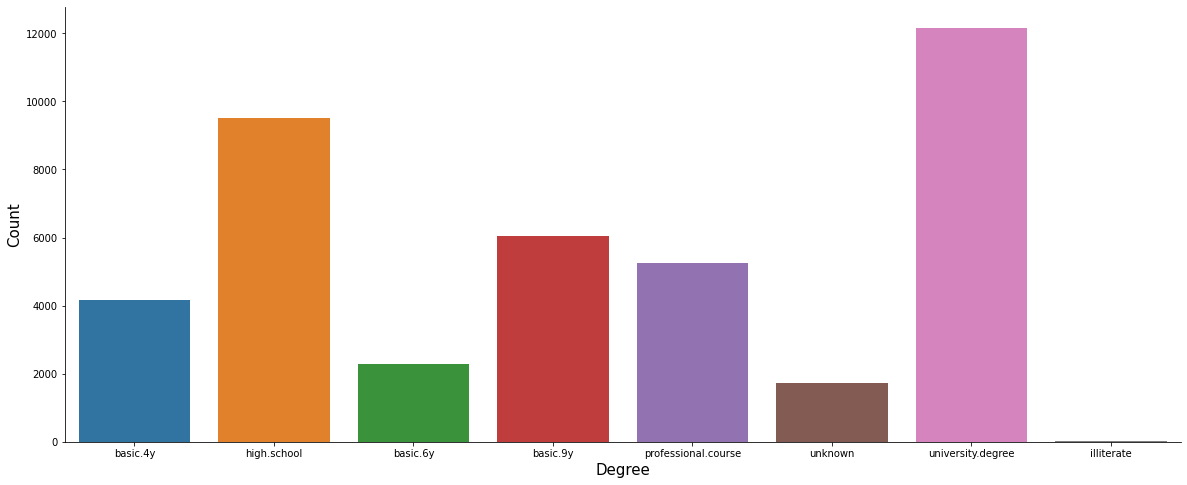

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'education', data = bank)
ax.set_xlabel('Degree', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('', fontsize=15)
sns.despine()

<AxesSubplot:xlabel='job'>

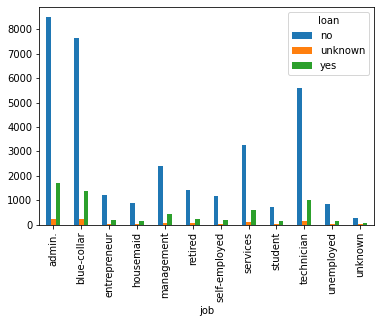

In [12]:
f_m_eachgroup = bank.pivot_table('age',index='job', columns=['loan'], aggfunc='count')
f_m_eachgroup.plot(kind='bar')

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['job'] = labelencoder_X.fit_transform(bank['job']) 
bank['marital'] = labelencoder_X.fit_transform(bank['marital']) 
bank['education'] = labelencoder_X.fit_transform(bank['education']) 
bank['default'] = labelencoder_X.fit_transform(bank['default']) 
bank['housing'] = labelencoder_X.fit_transform(bank['housing']) 
bank['loan'] = labelencoder_X.fit_transform(bank['loan']) 
bank['contact'] = labelencoder_X.fit_transform(bank['contact']) 
bank['month'] = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_X.fit_transform(bank['day_of_week']) 
bank['poutcome'] = labelencoder_X.fit_transform(bank['poutcome']) 

#handy task above :
#bank_client['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
#or use get_dummies 


In [14]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,2,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,2,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
def classi_duration(x):
    if x <= np.quantile(bank['duration'], 0.25):
        return 0
    elif x > np.quantile(bank['duration'], 0.25) and x <= np.quantile(bank['duration'], 0.50):
        return 1
    elif x >= np.quantile(bank['duration'], 0.50):
        return 2
bank['duration'] = bank['duration'].apply(classi_duration)


In [16]:
bank['duration']

0        2
1        1
2        2
3        1
4        2
        ..
41183    2
41184    2
41185    2
41186    2
41187    2
Name: duration, Length: 41188, dtype: int64

In [17]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,2,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,1,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,2,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,2,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,2,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,2,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


## Make Model For Mashine Learning:
### first delete label y from dataset 
### second create train test 
### third use standard scaller to data have same scale 


In [18]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [19]:
bank.drop('y', axis='columns', inplace=True)

In [20]:
from sklearn.model_selection  import  train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(bank, y, test_size=0.3, random_state=1)
x_train.shape

(28831, 20)

In [22]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler()
x_train = standard_scale.fit_transform(x_train)
x_test = standard_scale.transform(x_test)
x_train.shape

(28831, 20)

## Decision Tree:

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [24]:
model_tree = DecisionTreeClassifier(max_depth=8)
model_tree.fit(x_train, y_train)
model_tree_p = model_tree.predict(x_test)

In [25]:
export_graphviz(

        model_tree,
        out_file=('model_tree.dot'),
        feature_names=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
        class_names=['y', 'n'],
        rounded=True,
        filled=True)
# run on command line : dot -Tpng model_tree.dot -o model_tree_bank.png

In [26]:
from sklearn.metrics import  accuracy_score, confusion_matrix

print(confusion_matrix(y_test, model_tree_p))
print(round(accuracy_score(y_test, model_tree_p),2)*100)


[[10666   278]
 [  885   528]]
91.0


## SUPPORT VECTOR MASHINE: 

In [27]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', gamma=5, probability=True, C=100)
model_svc.fit(x_train, y_train)

/home/hassan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=100, gamma=5, probability=True)

In [28]:
model_svc_p = model_svc.predict(x_test)
print(confusion_matrix(y_test, model_svc_p))
print(round(accuracy_score(y_test, model_svc_p),2)*100)

[[10780   164]
 [ 1358    55]]
88.0


## RandomClassifier:

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
random_forest.fit(x_train, y_train)
random_forest_p = random_forest.predict(x_test)

<ipython-input-29-769d78ae4736>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


In [30]:
print(confusion_matrix(y_test, random_forest_p))
print(round(accuracy_score(y_test, random_forest_p),2)*100)

[[10620   324]
 [  903   510]]
90.0


## Ensemle Learning:

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
voting = VotingClassifier(
estimators=[('randomforest',random_forest), ('support vector mashine', model_svc), ('decision tree', model_tree)],
voting='soft'
)
voting.fit(x_train, y_train)

/home/hassan/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('randomforest',
                              RandomForestClassifier(n_estimators=200)),
                             ('support vector mashine',
                              SVC(C=100, gamma=5, probability=True)),
                             ('decision tree',
                              DecisionTreeClassifier(max_depth=8))],
                 voting='soft')

In [33]:
voting_p = voting.predict(x_test)
print(confusion_matrix(y_test, voting_p))
print(round(accuracy_score(y_test, voting_p),2)*100)

[[10848    96]
 [ 1130   283]]
90.0


In [34]:
from sklearn.model_selection import GridSearchCV


In [35]:
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#clf = GridSearchCV(model_svc, parameters)
#clf.fit(x_train, y_train)

In [36]:
#clf_p = clf.predict(x_test)

In [37]:
#print(round(accuracy_score(y_test, clf_p),2)*100)

NameError: name 'metrics' is not defined

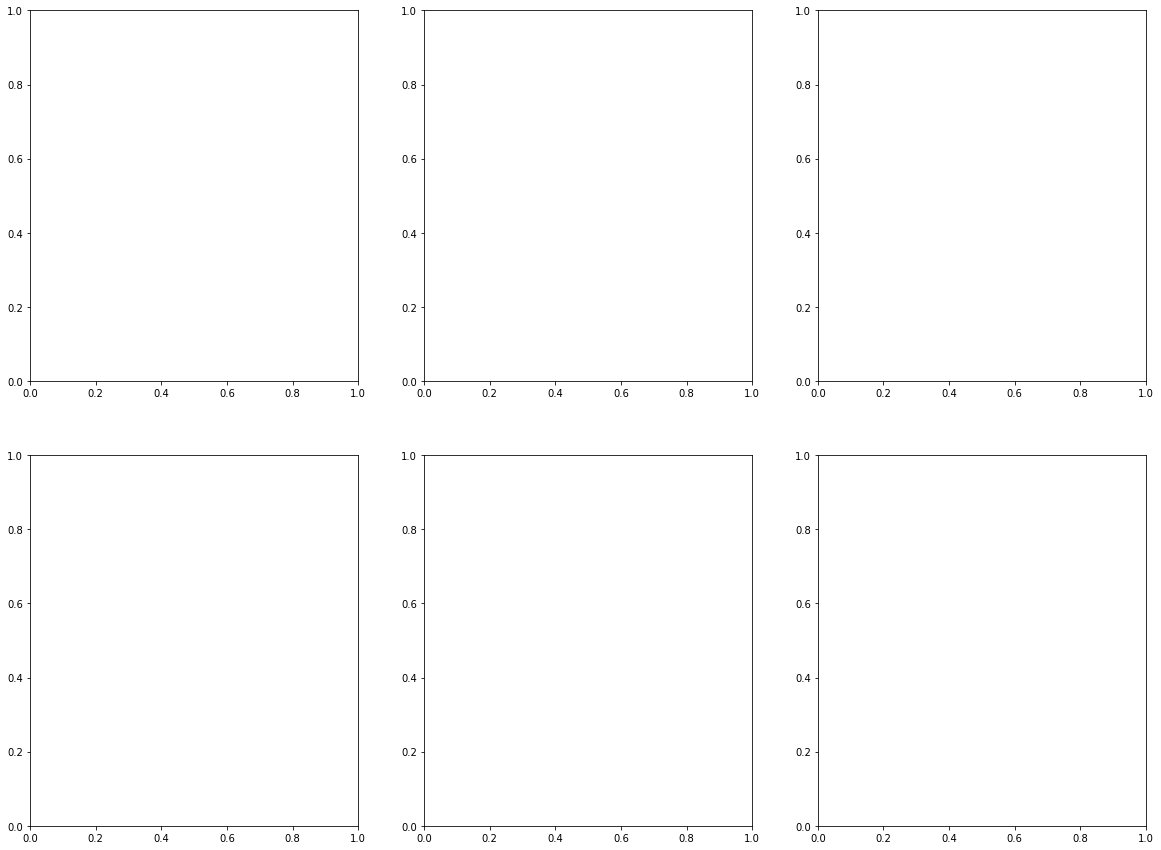

In [38]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
probs = random_forest.predict_proba(x_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


In [39]:
from sklearn.metrics import classification_report
print('KNN Confusion Matrix\n', confusion_matrix(y_test, random_forest_p))


KNN Confusion Matrix
 [[10620   324]
 [  903   510]]
